<a href="https://www.kaggle.com/code/seyiprisca/bellabeta-capstone-project?scriptVersionId=103371378" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **BELLABEAT CAPSTONE PROJECT**

**1.	Company Background**

According to Forbes, “Bellabeat is a data-oriented wellness tech company that was founded by Sandro Mur, Urška Sršen, and Lovepreet Singh in 2013” (Robter, 2020). The company is global with offices in London, Hong Kong and Zagreb, but is headquartered in San Francisco. The company focuses on women’s health and wellness with a collection of wearable and non-wearable tech. The four pillars of their brand include: smart insights, women-centric, holistic approach and body positivity. With this in mind, their products focus on including metrics around a woman’s menstrual cycle stating on their website that “Bellabeat helps you get in sync with your natural cycle” and that “through tracking your body’s bio-responses and aligning that data with your hormonal cycle, you’ll always know why you feel how you do.”

The company’s wearable products include:
**Ivy** – “a health tracker disguised as smart jewelry”
**Time** – “an elegant hybrid wellness watch”
**Leaf** – available in three styles: chakra, urban, & crystal and can be worn as a necklace, bracelet or clip. This was Bellabeat’s classic wellness tracker.
**Spring** – a “smart water bottle” designed to track your drinking / hydration habits.

All of the company’s wearables sync to their Bellabeat app where members can check their metrics. The wearables track activity (steps taken, distanced traveled, calories burned and activity minutes) & sleep and through the app you can also track your menstrual cycle, hydration (if not using Spring) & meditation. Their IVY wearable also tracks heart rate metrics. Bellabeat also offers a Wellness Coach app with “unlimited access to 400+ education video, written, and audio content from areas of beauty, fitness, mindfulness, women’s health and more” through their Bellabeat+ membership. 


**2.	Business task**

Bellabeat is trying to expand their current customer reach and serve more people with their health devices and products. Business task is to analyze smart device usage data in order to gain insight into ****“how consumers use non-Bellabeat smart devices and apply the insights gained in deciding how this can influence their marketing strategy and in turn bring about their growth”.**

Key stakeholders of this study are; Urška Sršen – Bellabeat’s cofounder and Chief Creative Officer, Sando Mur – Mathematician and Bellabeat’s cofounder Bellabeat’s and its marketing analytics team – a team of data analyst


**3.	Description of all data sources used**

The data source used for this case study is [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit). The dataset was made available through Mobius. This Kaggle data set contains personal fitness tracker from thirty Fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

It includes information about daily, hourly activities, steps, and heart rate that can be used to explore users’ habits and patterns.
Data used is easily accessible, based on its metadata, its open source and can be copied, modified and distributed freely without permission hurdles. Limitation of the dataset is the period/ time it was collected which was 2016, about 6 years ago making the dataset stale and not a reflection of current and recent trend of customers’ interaction with bellabeats devices. 

Furthermore, the data was collected only during a 61-day period (03.12.2016 - 05.12.2016), small data sample size was used (30 Fitbit tracker users based on information provided but dataset showed 33 users sampled – a larger sample size would be more representative for our analysis). Lastly, bellabeat products are targeted at women but the data set did not address gender or other demographic information. 


**4.	Documentation of data cleaning/manipulation**

For the case study analysis, the following datasets were chosen:

Daily_Activity_Merged
Daily_Sleep_Merged
Hourly_Steps_Merged
Hourly_Intensity_Merged
Hourly_Calories_Merged

Each dataset was cleaned using spreadsheet. 
I sorted and filtered by ID to obtain how many unique users there were within the dataset. 
Trimmed white spaces. Checked for duplicate data using the 'duplicate data' tool in Excel.
Formatted date data into MM/DD/YY date format. 
Sorted by date to find the first and last date of the dataset (this is what first indicated only a 31-day period of activity was captured as opposed to 61-day specified). 
Separated Date and Hour into two columns when needed for later analysis, utilized the 'Text to Columns' tool to do so. 
Formatted any time data into 00:00:00 format for consistency. Checked Id entries and other columns for LEN to make sure the data was correct and uniform in length. After the cleaning process was finished, only 3 rows of duplicate information were found within the Daily_Sleep_Merged file. These were removed before analysis. After cleaning the data, I decided to work with SQL, spreadsheet and Tableau to analyze the information and provide visualization of result.


**5.	Analyze and share**

Uploaded FitBit Fitness Tracker Data into Big Query under the project bellabeta-capstone-study.
Uploaded the following clean data sets:
dailyActivity_merged
sleepDay_merged
hourlyCalroie_merged
hourlyIntensity_merged
hourlySteps_merged


In [ ]:
SELECT Id,
COUNT(Id) AS Total_Id
FROM `bellabeta-capstone-study.Fitabase_Data.dailyActivity_merged`
GROUP BY Id

participants’ verification: Checked for number of participants by counting number of distinct Ids in each dataset.

The query above was repeated with each dataset (changing the FROM clause each time) and received these results:
* Daily_Activity_Merged - 33
* sleepDay_merged - 24
* Hourly_Calorie_Merged - 33
* Hourly_Intensity_Merged - 33
* Hourly_Steps_Merged – 33



**Analysis of users’ data provided**

The first step of analysis was to confirm the number of times each user wore/used FitBit tracker in the month under review.


In [ ]:
SELECT Id,
COUNT(Id) AS Total_Id
FROM `bellabeta-capstone-study.Fitabase_Data.dailyActivity_merged`
GROUP BY Id

See spreadsheet result here [See spreadsheet result here](https://docs.google.com/spreadsheets/d/1NfO_i_X6n3bPB8D8XY9hV4fNw3hf8AIhyRDn1GCL9SM/edit?usp=sharing)


64% of users consistently logged data for the entire data time period (04-12-2016 to 05-12-2016). If we account for users who only missed 1-3days, it brings the percentage to 82% of users who consistently wore their FitBit tracker for the period. 

Now that we know a good percentage of users wore their tracker consistently, a group metric was created to further categorize users from active to light users using the metric below:

**Active User** - wore their tracker for 25-31 days
**Moderate User** - wore their tracker for 15-24 days
**Light User** - wore their tracker for 0 to 14 days


In [ ]:
SELECT Id,
COUNT(Id) AS Total_Logged_Uses,
CASE
WHEN COUNT(Id) BETWEEN 25 AND 31 THEN 'Active User'
WHEN COUNT(Id) BETWEEN 15 and 24 THEN 'Moderate User'
WHEN COUNT(Id) BETWEEN 0 and 14 THEN 'Light User'
END Fitbit_Usage_Type
FROM `bellabeta-capstone-study.Fitabase_Data.dailyActivity_merged`
GROUP BY Id

[See spreadsheet result here](https://docs.google.com/spreadsheets/d/1BaYJBcwfETwMTs3ZwrVvlMVO18i28zbPWEE41gdbhJE/edit?usp=sharing)

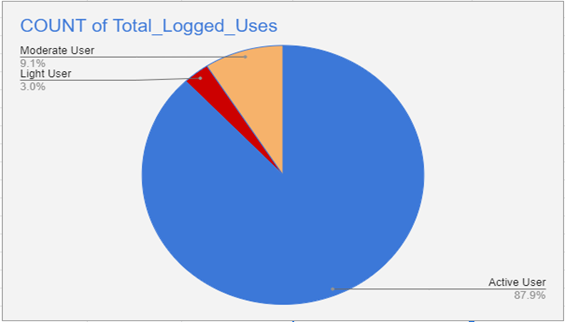

Next step is to get a summary of activity levels of each user by ID by checking the MIN, MAX, & AVG of total steps, total distance and calories expended.

In [ ]:
SELECT Id,
MIN(TotalSteps) AS Min_Total_Steps,
MAX(TotalSteps) AS Max_Total_Steps, 
AVG(TotalSteps) AS Avg_Total_Stpes,
MIN(TotalDistance) AS Min_Total_Distance, 
MAX(TotalDistance) AS Max_Total_Distance, 
AVG(TotalDistance) AS Avg_Total_Distance,
MIN(Calories) AS Min_Total_Calories,
MAX(Calories) AS Max_Total_Calories,
AVG(Calories) AS Avg_Total_Calories,
MIN(VeryActiveMinutes) AS Min_Very_Active_Minutes,
MAX(VeryActiveMinutes) AS Max_Very_Active_Minutes,
AVG(VeryActiveMinutes) AS Avg_Very_Active_Minutes,
MIN(FairlyActiveMinutes) AS Min_Fairly_Active_Minutes,
MAX(FairlyActiveMinutes) AS Max_Fairly_Active_Minutes,
AVG(FairlyActiveMinutes) AS Avg_Fairly_Active_Minutes,
MIN(LightlyActiveMinutes) AS Min_Lightly_Active_Minutes,
MAX(LightlyActiveMinutes) AS Max_Lightly_Active_Minutes,
AVG(LightlyActiveMinutes) AS Avg_Lightly_Active_Minutes,
MIN(SedentaryMinutes) AS Min_Sedentary_Minutes,
MAX(SedentaryMinutes) AS Max_Sedentary_Minutes,
AVG(SedentaryMinutes) AS Avg_Sedentary_Minutes
From `bellabeta-capstone-study.Fitabase_Data.dailyActivity_merged`
Group BY Id

[See spreadsheet result here](https://docs.google.com/spreadsheets/d/17eNtt2yUev-LIT5RGVYAJLhuMOi_5gv_gU8jhpJnKLI/edit?usp=sharing)

To get a better picture, zoom in on the average of the different minute types by ID and weekday (used the **CHOOSE** function in spreadsheet for the conversion of activity_day to weekdays). 

In [ ]:
SELECT Id, 
avg(VeryActiveMinutes) AS Avg_Very_Active_Minutes,
avg(FairlyActiveMinutes) AS Avg_Fairly_Active_Minutes,
avg(LightlyActiveMinutes) AS Avg_Lightly_Active_Minutes,
avg(SedentaryMinutes) AS Avg_Sedentary_Minutes,
from `bellabeta-capstone-study.Fitabase_Data.dailyActivity_merged`
Group BY Id

In [ ]:
SELECT Activity_day,
ROUND (avg(VeryActiveMinutes), 2) AS Avg_Very_Active_Minutes,
ROUND (avg(FairlyActiveMinutes), 2) AS Avg_Fairly_Active_Minutes,
ROUND (avg(LightlyActiveMinutes), 2) AS Avg_Lightly_Active_Minutes,
ROUND (avg(SedentaryMinutes), 2) AS Avg_Sedentary_Minutes,
FROM `bellabeta-capstone-study.Fitabase_Data.dailyActivity_merged_weekday`
GROUP BY Activity_day

[See spreadsheet result here](https://docs.google.com/spreadsheets/d/1tIKuMS-L_oc2koeiRM1nETggF2gxjqRWUV6RCcl0jxQ/edit?usp=sharing)

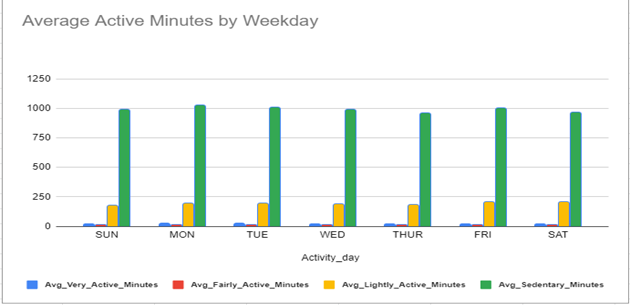

An important observation was made with regards to level of active minutes by weekday, which showed no significant difference between the weekdays. It can be inferred that users were consistent in their minute output each day. Bellabeat can leverage this to create activity goals for users as data already shows users are trying their best to meet their daily activities already.

To get more insights from the dataset, analysis was done on users based on active steps with an article by Healthline.com as a guide. The article is titled ***“How many steps do I need a day?” written by Sara Lindberg in 2019 which cited a 2011 study by Tudor-Locke et. al. titled “How many steps/day are enough? for adults”.*** The article stated that a total of 10,000 steps/day is a reasonable target for healthy adults. Lindberg (2019) breaks down activity level by steps into three categories based off the 2011 study by Tudor-Locke et. al.:

* Inactive: less than 5,000 steps per day
* Average (somewhat active): ranges from 7,500 to 9,999 steps per day
* Very Active: more than 12,500 steps per day

Sources: [Healthline article](https://www.healthline.com/health/calories-burned-walking#increase-your-burn), [Tudor-Locke et.al](https://ijbnpa.biomedcentral.com/articles/10.1186/1479-5868-8-79#Sec3![image.png](attachment:164e6137-441b-4400-b1e1-d07f2268749b.png)

Using this category as a guide, user types will be grouped into these categories. In the course of analysis, two additional categories were added to the already existing three provided by healthline **(Low Active User: 5,000 to 7,499 steps and Active User: 10,000 to 12,499 steps will be accounted for). **


In [ ]:
SELECT Id,
avg(TotalSteps) AS Avg_Total_Steps,
CASE
WHEN avg(TotalSteps) < 5000 THEN 'Inactive'
WHEN avg(TotalSteps) BETWEEN 5000 AND 7499 THEN 'Low Active User'
WHEN avg(TotalSteps) BETWEEN 7500 AND 9999 THEN 'Average Active User'
WHEN avg(TotalSteps) BETWEEN 10000 AND 12499 THEN 'Active User'
WHEN avg(TotalSteps) >= 12500 THEN 'Very Active User'
END User_Type
FROM `bellabeta-capstone-study.Fitabase_Data.dailyActivity_merged`
GROUP BY Id


[See spreadsheet result here](https://docs.google.com/spreadsheets/d/15x9AtzUkP2Dq3SGBNGhbTqiO7qyGU3KjArmKGzGr4TQ/edit?usp=sharing)

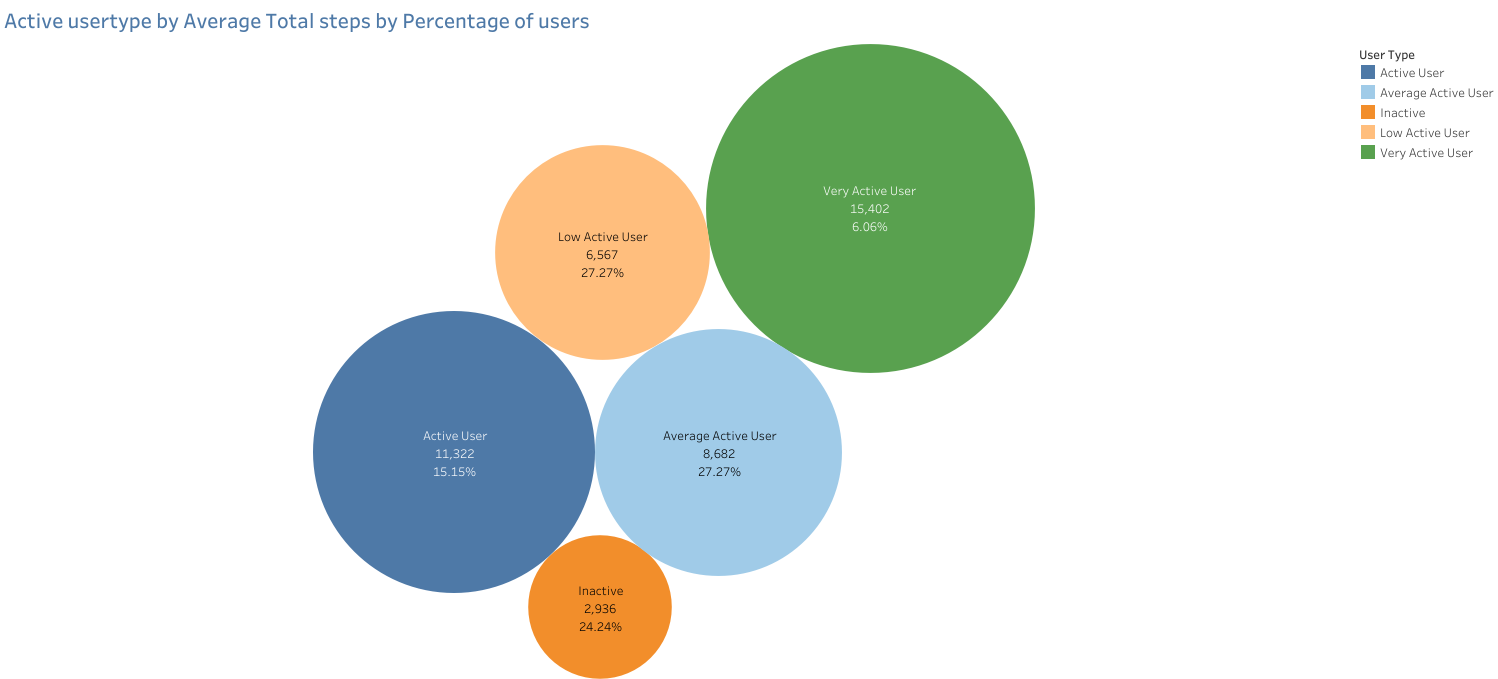

Looking at this result, we can tell that 75% of users did not take an average of 7,500 steps for the period under review. 

To get more insight on user active group, total steps taken by weekday was considered to give a broader view. 

In [ ]:
SELECT Activity_day,
ROUND (avg(TotalSteps), 2) AS Average_Total_Steps,
FROM `bellabeta-capstone-study.Fitabase_Data.dailyActivity_merged_weekday`
GROUP BY Activity_day
ORDER BY Average_Total_Steps DESC 

[See spreadsheet result here](https://docs.google.com/spreadsheets/d/1_x6zZqa-nUQvu8ozjKZWsRzDZdOhKCj0WoMS1Gs6EHg/edit?usp=sharing)

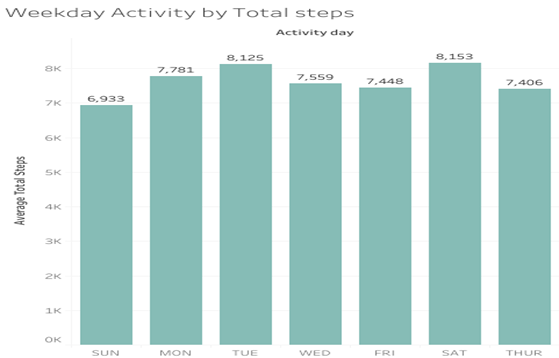

The difference between each day with reference to active steps wasn’t a lot, with Saturday having the highest steps, with Monday and Tuesday following closely. It can be inferred that users were more active following Sunday rest and Saturday being the first full day of the weekend, giving time for more activities and engagement

Took the analysis further by checking the hour of the day users were more active. 

In [ ]:
SELECT 
ActivityHour,
SUM(StepTotal) AS Total_Steps_By_Hour
FROM `bellabeta-capstone-study.Fitabase_Data.hourlySteps_merg
GROUP BY ActivityHour
ORDER BY Total_Steps_By_Hour DESC

[See spreadsheet result here](https://docs.google.com/spreadsheets/d/1NAYcX5deIcdY8vjI4CpAzfk4JWilRTNkBZWCQtSuEL0/edit?usp=sharing)

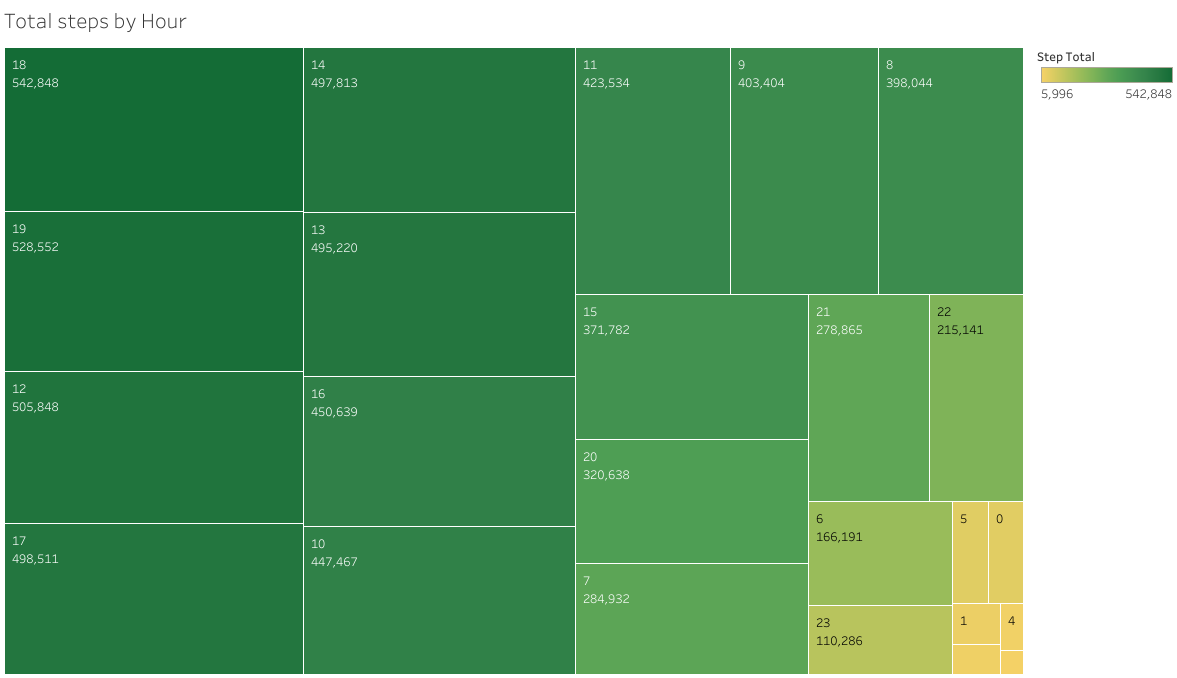

From the image above, we can deduce that users were more active between the hours of 12:00 – 19:00 based on their total steps count. It can be inferred that users were more active during the day which is the activity peak period for most people with room for activities and engagements that would naturally impact total steps for the day. 

To further confirm the day of the week users got active by hour of the day, we checked the total steps per hour per weekday.

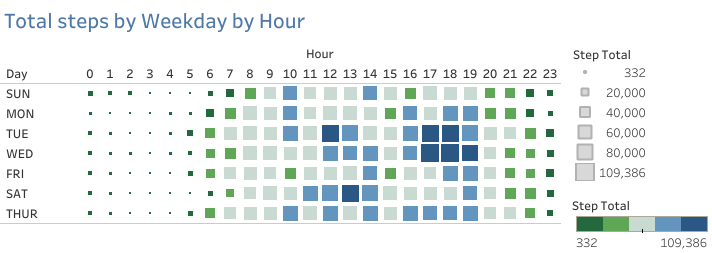

From the image above, we can conclude that users were most active weekday and their step count by the hour increased as the day progressed and declined towards close of day. 

It is believed that calories are consumed with activities, so to get a view of calories consumed by each user per activity logged, we will be using the calorie data logged in relation to total steps and minutes. This will give a good view of activity level in relation to calories/energy expended, as calorie used serves as a metric for measuring daily calorie requirement which is a major health/fitness parameter. 

In [ ]:
SELECT Id, 
Sum(TotalSteps) AS Sum_total_steps,
SUM(Calories) AS Sum_Calories, 
SUM(VeryActiveMinutes + FairlyActiveMinutes) AS Sum_Active_Minutes
FROM `bellabeta-capstone-study.Fitabase_Data.dailyActivity_merged`
GROUP BY Id


[See spreadsheet result here](https://docs.google.com/spreadsheets/d/1R8xVtwz46G-yQDriu-4qca438aLAhEPHPTgTLx2VKv0/edit?usp=sharing)

From the analysis above, the correlation between calories, minutes and steps isn’t linear. 


To further check the relationship between calories burnt and the force exerted (intensity – which is the measurable amount of effort exerted in doing a task) in the course of the day, we checked total calories by total intensity by the hour of the day. 


In [ ]:
SELECT a.Id,a.ActivityHour,
SUM(a.Calories) AS Total_calories_hour,
SUM(i.TotalIntensity) AS Total_intensity,
FROM `bellabeta-capstone-study.Fitabase_Data.hourlyCalories_merged` AS a
INNER JOIN `bellabeta-capstone-study.Fitabase_Data.hourlyIntensities_merged` AS i ON((a.Id=i.Id) AND a.ActivityHour = i.ActivityHour) 
GROUP BY a.Id, a.ActivityHour
ORDER BY Total_calories_hour DESC;

[See spreadsheet result here](https://docs.google.com/spreadsheets/d/19dVNnzDko_4Pqp8TtB7qZJSR0kJ6BSRR84DGIDh7Pik/edit?usp=sharing)

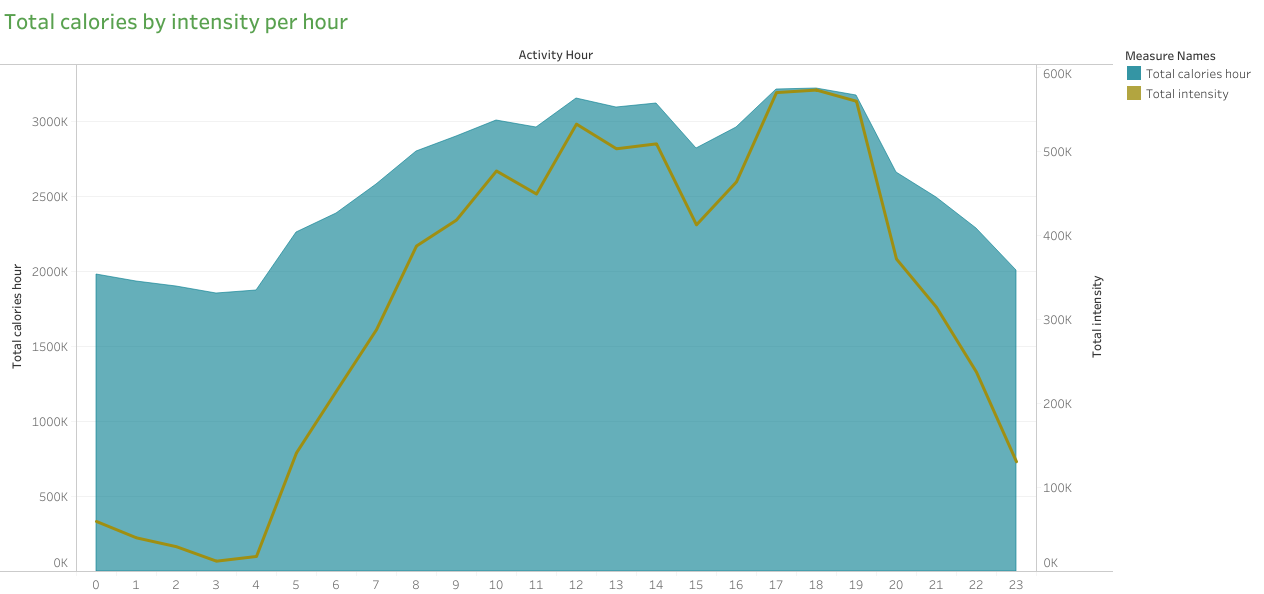

The trend between the calories burnt and the intensity throughout the day are similar. They both dip and rise around the same hours throughout the day.

Going further to analyse users sleep pattern, we checked for recommended sleep patterns and guide. According to the article ["How sleep works"](https://www.sleepfoundation.org/how-sleep-works/how-much-sleep-do-we-really-need#:~:text=National%20Sleep%20Foundation%20guidelines1,to%208%20hours%20per%20night.) the following sleep recommendation guide was quoted: 

* **Recommended Sleep**: Between 420 minutes (7 hours) and 540 minutes (9 hours).
* **Appropriate Sleep:** Between 360 minutes (6 hours) and 420 minutes (7 hours) or sleep greater than 540 minutes (9 hours).
* **Inadequate Sleep**: Sleep less than 360 minutes (6 hours).




In [ ]:
SELECT Id,
AVG(TotalMinutesAsleep) AS avg_Total_Minutes_Asleep,
CASE
WHEN AVG(TotalMinutesAsleep) BETWEEN 420 AND 540 THEN 'Recommended Sleep'
WHEN AVG(TotalMinutesAsleep) BETWEEN 360 AND 420 THEN 'Appropriate Sleep'
WHEN AVG(TotalMinutesAsleep) > 540 THEN 'Appropriate Sleep'
WHEN AVG(TotalMinutesAsleep) < 360 THEN 'Inadequate Sleep'
END 
FROM `bellabeta-capstone-study.Fitabase_Data.sleepDay_merged`
GROUP BY Id;

[See spreadsheet result here](https://docs.google.com/spreadsheets/d/1J9LRd3Gd-ebqd6g00WwC5Tn3PTzgVUIFDyQJFUyiehY/edit?usp=sharing)

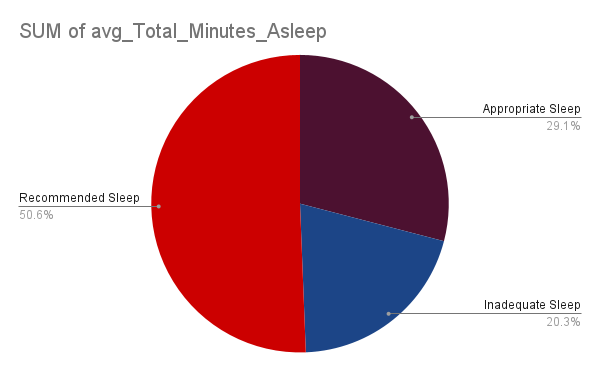

The results on the “Sleep Chart” showed that 50.6% of the participants got the recommend amount of sleep, while 29% got the appropriate amount of sleep and 20.3% got an inadequate amount of sleep on a daily basis. Lack of sleep leads to more stress which means users with inadequate sleep have a higher stress level.

Then, we consider the number of minutes users spent each day sleeping.

In [ ]:
SELECT 
SleepDay,
SUM(TotalMinutesAsleep) AS Total_Minutes_Asleep
FROM `bellabeta-capstone-study.Fitabase_Data.sleepDay_merged`
WHERE SleepDay IS NOT NULL
GROUP BY SleepDay

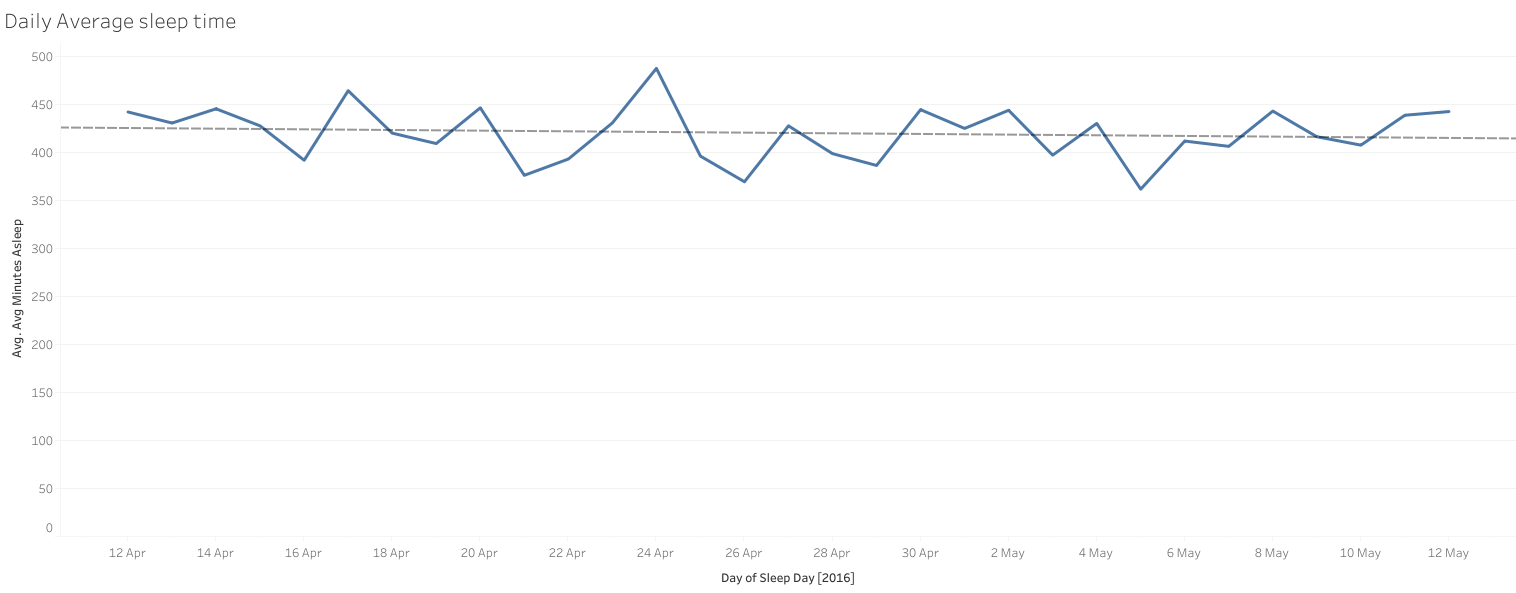

From the graph, its observed that there was a steady decline in sleep pattern (average daily sleep duration) which means users slept for an average of about 7hours daily.

**6.	Conclusions and Recommendations**

* Bellabeats’ focus is mainly on women’s health and despite the dataset provided being silent on demographic information, analysis was carried out based on the sampling bias but recommendation to the team will be to engage a larger audience of users that will create large date set and also include demographic information in the survey distributed for more robust insight to users data.

* The weight and heartrate data set had less than 10 responses from users which can be an indication that the function on the tracker might not be known to users. A survey to ascertain users are familiar with the weight and heart rate function can be distributed while a short captivating video explaining how these functions work can be used as an advert to get more users informed. 

* To the users of Bellabeat, a push notification can be sent to active users particularly between the hours of 12-19hr which is the most active window based on analysis and a ‘great job’ motivation alert as reward for reminding other users around them to get active. 

* From the analysis, it also showed that most user did not reach the recommended 10,000 steps a day for a healthy individual as sedentary minutes had the highest output. To engage more users, reminders at different time of the day such as **‘take a walk’, ‘move’, ‘complete your steps for today’** should be added to the app as this can spur users to increase their daily steps and meet up with the daily requirement of 10,000 steps.

* To better get users engaged on the calorie log, Bellabeat should include daily meal and snack ideas for lunch which is within the most active window so users can remember to log their data while staying healthy. The daily calorie requirement can also be included so users are sure they do not consume more/less.  

* Notifications should be sent to users from a particular time (22:00hr preferably) at intervals of 15 minutes to remind them to go to bed early. 

* A push notification should also go out at different time of the day reminding user to take a walk, stretch, or engage in a few minutes of yoga to efficiently reduce sedentary time and increase activity and sleep time.



